In [126]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit


#Neural Networks implementation
import keras
import tensorflow as tf
# from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

from bayes_opt import BayesianOptimization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)
from keras.layers import Dense, BatchNormalization, Dropout, SimpleRNN

# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from pickle import dump,load

from keras.preprocessing.sequence import TimeseriesGenerator
import itertools

In [2]:
df1 = pd.read_csv(r"C:\Users\Acer\Desktop\HDFC_Internship\DATA\Fraud_Data_Final.csv")

In [3]:
df1.shape

(73385, 9)

In [4]:
df1.size

660465

In [5]:
df1.head()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,0,1653444,2018-09-20 11:49:41,0,Hotels,88.11,14903381,172,0
1,1,1657926,2018-09-20 20:21:57,0,Grocery,78.25,14934117,172,0
2,2,1174679,2018-08-01 12:11:36,0,Airways,62.28,10584696,122,0
3,3,1175894,2018-08-01 13:58:40,0,Airways,80.16,10591120,122,0
4,4,758479,2018-06-19 4:18:11,0,Insulation,90.07,6841091,79,0


In [6]:
df1.tail()

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
73380,38095,903947,2018-07-04 7:55:16,2015,Retail,63.03,8150116,94,0
73381,38096,243562,2018-04-26 10:24:24,2015,Retail,45.23,2197464,25,0
73382,38098,773468,2018-06-20 13:49:15,2015,Retail,31.59,6961755,80,0
73383,38100,1177522,2018-08-01 16:44:45,2016,Retail,27.61,10601085,122,0
73384,38101,948456,2018-07-08 17:53:44,2016,Retail,11.41,8531624,98,0


In [7]:
df1.describe(include='all')

,SERIAL NUMBER,TRANSACTION_ID,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
count,73385.000000,7.338500e+04,73385,73385.000000,73385,73385.000000,7.338500e+04,73385.000000,73385.000000
unique,NaN,NaN,70904,NaN,10,NaN,NaN,NaN,NaN
top,NaN,NaN,2018-04-05 13:03:35,NaN,Insulation,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,NaN,9512,NaN,NaN,NaN,NaN
mean,41048.878204,8.233976e+05,NaN,2173.954514,NaN,55.177761,7.419868e+06,85.383307,0.008939
std,26492.483939,5.479239e+05,NaN,1409.347516,NaN,43.472514,4.939476e+06,57.169018,0.094124
min,0.000000,6.295000e+03,NaN,0.000000,NaN,0.000000,5.153000e+04,0.000000,0.000000
25%,18346.000000,4.632880e+05,NaN,967.000000,NaN,21.790000,4.177458e+06,48.000000,0.000000
50%,36692.000000,7.594650e+05,NaN,1941.000000,NaN,46.030000,6.850855e+06,79.000000,0.000000
75%,63533.000000,1.347494e+06,NaN,3334.000000,NaN,78.990000,1.214317e+07,140.000000,0.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73385 entries, 0 to 73384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SERIAL NUMBER                 73385 non-null  int64  
 1   TRANSACTION_ID                73385 non-null  int64  
 2   DATETIME                      73385 non-null  object 
 3   CUSTOMER_ID                   73385 non-null  int64  
 4   TYPE of TRANSACTION           73385 non-null  object 
 5   TRASCATION AMOUNT             73385 non-null  float64
 6   TIME_SECONDS                  73385 non-null  int64  
 7   DAYS_SINCE_FIRST_TRANSACTION  73385 non-null  int64  
 8   FRAUD                         73385 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.0+ MB


In [9]:
df1.isnull().sum()

SERIAL NUMBER                   0
TRANSACTION_ID                  0
DATETIME                        0
CUSTOMER_ID                     0
TYPE of TRANSACTION             0
TRASCATION AMOUNT               0
TIME_SECONDS                    0
DAYS_SINCE_FIRST_TRANSACTION    0
FRAUD                           0
dtype: int64

In [10]:
df1.dtypes.value_counts()

int64      6
object     2
float64    1
dtype: int64

In [11]:
df1 = df1.drop(["SERIAL NUMBER","TRANSACTION_ID"], axis = 1)

In [12]:
df1['FRAUD'].value_counts(normalize=True)

0    0.991061
1    0.008939
Name: FRAUD, dtype: float64

In [13]:
df1['TYPE of TRANSACTION'].value_counts().count()

10

In [14]:
df1['TYPE of TRANSACTION'].value_counts()

Insulation     9512
Food           9211
Electronics    7931
Clothing       7394
Grocery        7115
Retail         7000
Footwear       6621
Airways        6584
Hotels         6086
Rental Car     5931
Name: TYPE of TRANSACTION, dtype: int64

In [15]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 1].value_counts()

Food           107
Insulation      91
Electronics     77
Retail          73
Airways         66
Hotels          65
Grocery         63
Footwear        51
Rental Car      42
Clothing        21
Name: TYPE of TRANSACTION, dtype: int64

In [16]:
df1['TYPE of TRANSACTION'][df1["FRAUD"] == 0].value_counts()

Insulation     9421
Food           9104
Electronics    7854
Clothing       7373
Grocery        7052
Retail         6927
Footwear       6570
Airways        6518
Hotels         6021
Rental Car     5889
Name: TYPE of TRANSACTION, dtype: int64

In [17]:
df1['CUSTOMER_ID'].value_counts().count()

3456

In [18]:
df1['CUSTOMER_ID'].value_counts()

1848    57
571     57
1157    57
98      56
1881    55
        ..
2288     1
2145     1
4917     1
2023     1
1896     1
Name: CUSTOMER_ID, Length: 3456, dtype: int64

In [19]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 1].value_counts()

1692    5
613     5
701     5
1085    5
1743    5
       ..
1719    1
1708    1
1706    1
1693    1
1992    1
Name: CUSTOMER_ID, Length: 536, dtype: int64

In [20]:
df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

571     57
1848    57
1157    57
98      56
1881    55
        ..
2357     1
2288     1
2145     1
4917     1
1896     1
Name: CUSTOMER_ID, Length: 3455, dtype: int64

In [21]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 1].value_counts(normalize=True)

Food           0.163110
Insulation     0.138720
Electronics    0.117378
Retail         0.111280
Airways        0.100610
Hotels         0.099085
Grocery        0.096037
Footwear       0.077744
Rental Car     0.064024
Clothing       0.032012
Name: TYPE of TRANSACTION, dtype: float64

In [22]:
df1["TYPE of TRANSACTION"][df1["FRAUD"] == 0].value_counts(normalize=True)

Insulation     0.129536
Food           0.125177
Electronics    0.107990
Clothing       0.101376
Grocery        0.096963
Retail         0.095244
Footwear       0.090335
Airways        0.089620
Hotels         0.082787
Rental Car     0.080972
Name: TYPE of TRANSACTION, dtype: float64

In [23]:
df1.head()

,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,TIME_SECONDS,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,2018-09-20 11:49:41,0,Hotels,88.11,14903381,172,0
1,2018-09-20 20:21:57,0,Grocery,78.25,14934117,172,0
2,2018-08-01 12:11:36,0,Airways,62.28,10584696,122,0
3,2018-08-01 13:58:40,0,Airways,80.16,10591120,122,0
4,2018-06-19 4:18:11,0,Insulation,90.07,6841091,79,0


In [24]:
classes=df1['FRAUD'].value_counts()
normal_share=round(classes[0]/df1['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df1['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.11, 0.89)

In [25]:
classes

0    72729
1      656
Name: FRAUD, dtype: int64

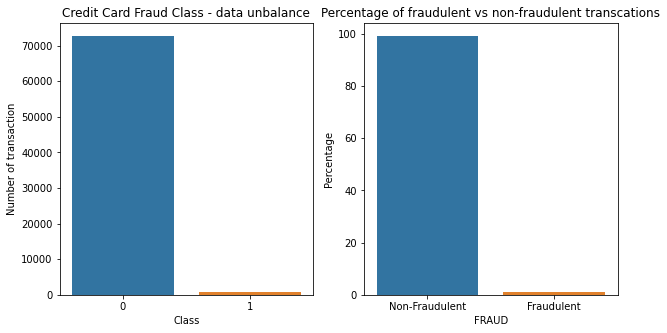

In [26]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = df1["FRAUD"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")

plt.subplot(1,2,2)
fraud_percentage = {'FRAUD':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x=df_fraud_percentage['FRAUD'], y=df_fraud_percentage['Percentage'])
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

In [27]:
counts = df1['CUSTOMER_ID'][df1["FRAUD"] == 0].value_counts()

df= df1[    (df1['CUSTOMER_ID'].isin(counts[counts > 10].index)) | (df1["FRAUD"] == 1)   ]

# df = df1

In [28]:
classes=df['FRAUD'].value_counts()
normal_share=round(classes[0]/df['FRAUD'].count()*100,2)
fraud_share=round(classes[1]/df['FRAUD'].count()*100, 2)
normal_share, fraud_share

(99.05, 0.95)

In [29]:
df["FRAUD"].value_counts()

0    68302
1      656
Name: FRAUD, dtype: int64

In [30]:
df1["FRAUD"].value_counts()

0    72729
1      656
Name: FRAUD, dtype: int64

In [31]:
# drop unnecessary columns
# df = df.drop("SERIAL NUMBER", axis = 1)
df = df.drop("TIME_SECONDS", axis = 1)

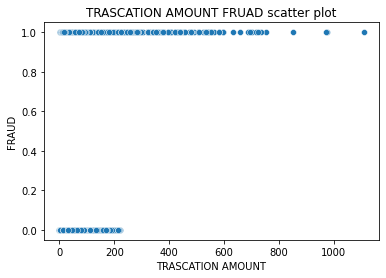

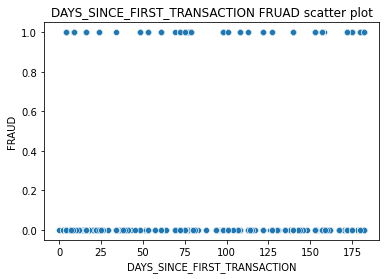

In [32]:
features = [ 'TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    sns.scatterplot(x = df[f], y = df["FRAUD"])
    title = f + " FRUAD scatter plot"
    plt.title(title)
    plt.show()
    

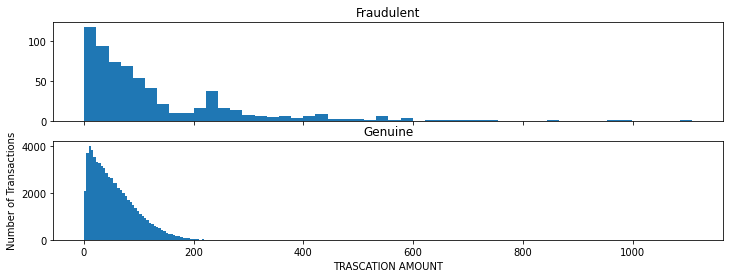

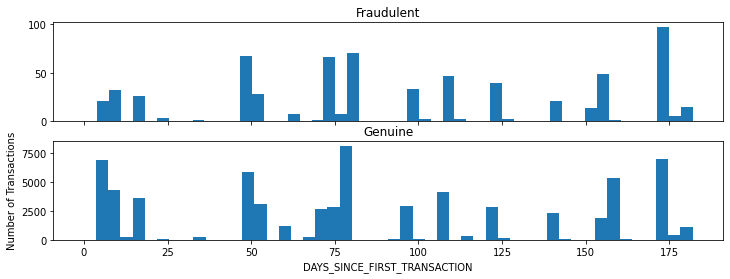

In [33]:
features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']

for f in features:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

    ax1.hist(df[f][df["FRAUD"] == 1], bins = 50)
    ax1.set_title('Fraudulent')

    ax2.hist(df[f][df["FRAUD"] == 0], bins = 50)
    ax2.set_title('Genuine')

    plt.xlabel(f)
    plt.ylabel('Number of Transactions')
    plt.show()

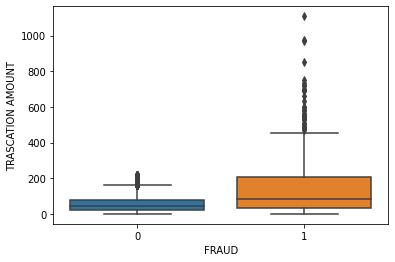

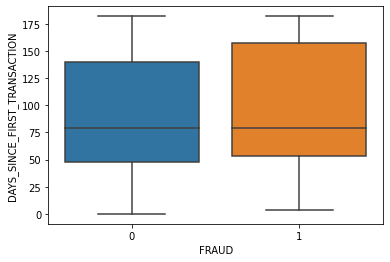

In [34]:
#Boxplot for the features, in order to visualiza the outliers.

features = ['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION']
for f in features:
    sns.boxplot(x=df['FRAUD'], y=df[f])
    plt.show()
    

<Figure size 432x288 with 0 Axes>

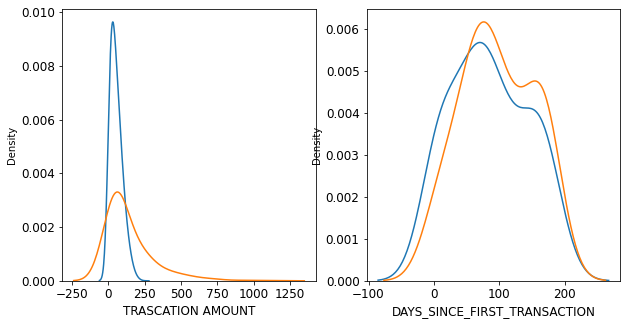

In [35]:
# Plotting all the variable in displot to visualise the distribution
var = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


i = 0
t0 = df.loc[df['FRAUD'] == 0]
t1 = df.loc[df['FRAUD'] == 1]

plt.figure()
fig, ax = plt.subplots(1,2,figsize=(10,5))

for feature in var:
    i += 1
    plt.subplot(1,2,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [36]:
# generate binary values using get_dummies
# features = ["TYPE of TRANSACTION","quarter","weekday_name","month_name"]
df_dum = pd.get_dummies(df, columns=["TYPE of TRANSACTION"],prefix='', prefix_sep='')

df_dum.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,2018-06-19 4:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [37]:
df.head()

,DATETIME,CUSTOMER_ID,TYPE of TRANSACTION,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD
0,2018-09-20 11:49:41,0,Hotels,88.11,172,0
1,2018-09-20 20:21:57,0,Grocery,78.25,172,0
2,2018-08-01 12:11:36,0,Airways,62.28,122,0
3,2018-08-01 13:58:40,0,Airways,80.16,122,0
4,2018-06-19 4:18:11,0,Insulation,90.07,79,0


<AxesSubplot:>

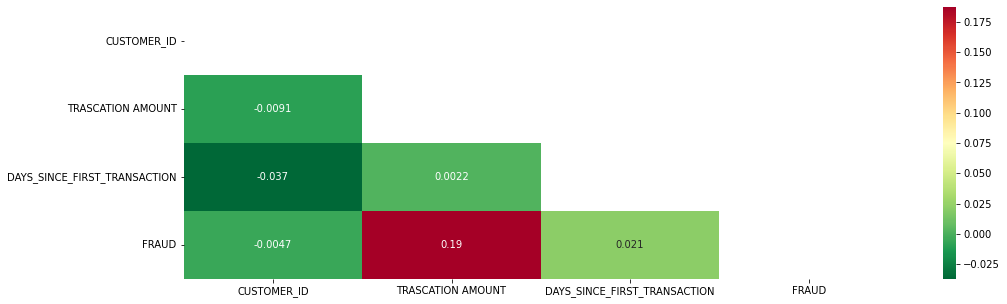

In [38]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='RdYlGn_r',annot=True, mask=mask)

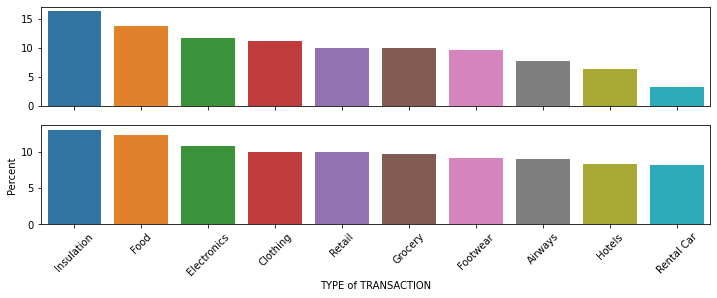

In [39]:
# features = ["TYPE of TRANSACTION", "month_name","quarter","time","weekday_name"]
features = ["TYPE of TRANSACTION"]
for f in features:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
    
    Feature = df[f][df["FRAUD"] == 1].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 1].value_counts(normalize=True).values

    ax1 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax1)

    Feature = df[f][df["FRAUD"] == 0].value_counts(normalize=True).index
    perc = 100*df[f][df["FRAUD"] == 0].value_counts(normalize=True).values
    
    ax2 = sns.barplot(data=pd.DataFrame({'Feature':Feature, 'Percent':perc}), x='Feature', y='Percent',ax=ax2)
    
    
    ax2.set(ylabel=None)
    ax1.set(xlabel=None)
    ax1.set(ylabel=None)
    
    plt.xlabel(f)
    plt.ylabel("Percent")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

vif to check multicollinearity

In [40]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features 
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X = X.copy()
    X["intercept"] = 1

    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [41]:
# # features to consider removing
# considered_features = ["TYPE of TRANSACTION", "month", "quarter","dayofweek","time","weekday_name"]
considered_features = ['CUSTOMER_ID','TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
0,CUSTOMER_ID,1.001457
2,DAYS_SINCE_FIRST_TRANSACTION,1.001379
1,TRASCATION AMOUNT,1.000086


Splitting the data into test and train

In [42]:
df = df_dum

In [43]:
df.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,2018-06-19 4:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [44]:
#drop date columns 
# df_dum = df_le.drop(["DATETIME","date","weekday_name"],axis=1)
df_dum = df_dum.drop(["DATETIME"],axis=1)

In [45]:
df_dum.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [274]:
y= df_dum["FRAUD"]
X = df_dum.drop("FRAUD", axis = 1)

In [275]:
X.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,1,0,0


In [276]:
# from sklearn.preprocessing import MinMaxScaler
# cols_to_norm = ['TRASCATION AMOUNT','DAYS_SINCE_FIRST_TRANSACTION']

# scaler = MinMaxScaler()
# X[cols_to_norm] = scaler.fit_transform(X[cols_to_norm])

In [277]:
# PCA or not
X_scaled = X

In [278]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [279]:
X_scaled_df.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,1,0,0


In [280]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state = 42, stratify=y)

In [281]:
y_train.value_counts(normalize=True)

0    0.990483
1    0.009517
Name: FRAUD, dtype: float64

In [282]:
X_train.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
5118,402,101.42,98,1,0,0,0,0,0,0,0,0,0
45438,3137,95.96,157,0,0,0,0,0,1,0,0,0,0
12783,826,39.81,4,0,1,0,0,0,0,0,0,0,0
58993,4266,25.10,9,0,0,0,0,1,0,0,0,0,0
47908,3324,70.88,108,0,0,1,0,0,0,0,0,0,0


# Model Building with Imbalance data

In [283]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [284]:
# ROC Curve function(receiver operating characteristic curve)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

## 1.Logistic Regression

In [285]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} # larger C - more prone to overfit
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(max_iter=1000),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6928205019535153
Best hyperparameters:  {'C': 0.1}


In [286]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.348459,0.266223,0.022334,0.003300,0.01,{'C': 0.01},0.685435,0.676002,0.691434,0.709376,...,0.686814,0.013221,6,0.692053,0.691259,0.686056,0.683163,0.692343,0.688975,0.003697
1,1.665374,0.241178,0.018777,0.001589,0.1,{'C': 0.1},0.688118,0.679534,0.703030,0.712335,...,0.692821,0.012817,1,0.704946,0.703138,0.695082,0.693398,0.701910,0.699695,0.004588
2,1.313740,0.410538,0.021595,0.003708,1,{'C': 1},0.686331,0.680008,0.710203,0.698345,...,0.691049,0.011650,5,0.700104,0.706866,0.698270,0.671671,0.705804,0.696543,0.012858
3,1.202248,0.382744,0.022505,0.005299,10,{'C': 10},0.686246,0.682043,0.711040,0.698679,...,0.691565,0.011720,3,0.700123,0.697788,0.698424,0.671841,0.706046,0.694844,0.011866
4,1.227783,0.412235,0.024155,0.006959,100,{'C': 100},0.686265,0.682007,0.712236,0.698689,...,0.692660,0.011377,2,0.700123,0.697798,0.689971,0.671853,0.704272,0.692803,0.011463
5,1.114979,0.227077,0.016932,0.003455,1000,{'C': 1000},0.686268,0.679625,0.711093,0.698690,...,0.691087,0.012173,4,0.700120,0.706999,0.698524,0.671854,0.706084,0.696716,0.012857


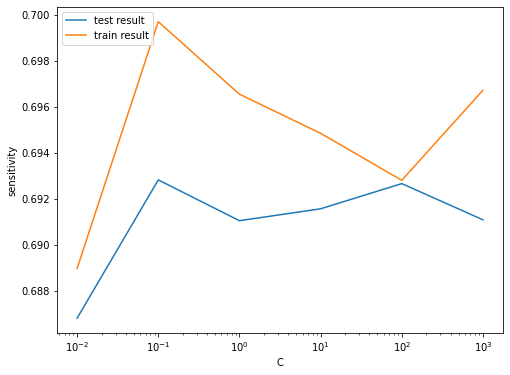

In [287]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [288]:
model_cv.best_params_

{'C': 0.1}

In [289]:
# Instantiating the model
log_reg_imb_model = LogisticRegression(C=0.1,max_iter=1000)

# Fitting the model with train data
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [290]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

Train Result:
Accuracy Score: 99.14%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.991364    1.000000  0.991371      0.995682      0.991446
recall         1.000000    0.093333  0.991371      0.546667      0.991371
f1-score       0.995663    0.170732  0.991371      0.583197      0.987813
support    54641.000000  525.000000  0.991371  55166.000000  55166.000000
_______________________________________________
Confusion Matrix:


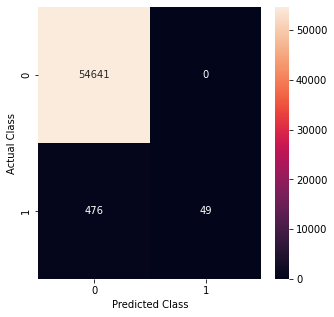

Train Result:
Accuracy Score: 99.20%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992012    1.000000  0.992024      0.996006      0.992088
recall         1.000000    0.160305  0.992024      0.580153      0.992024
f1-score       0.995990    0.276316  0.992024      0.636153      0.989154
support    13661.000000  131.000000  0.992024  13792.000000  13792.000000
_______________________________________________
Confusion Matrix:


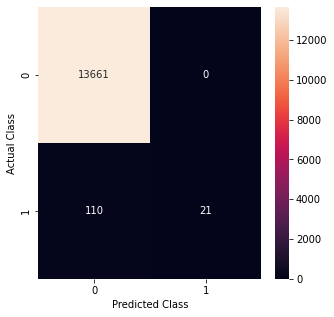

In [291]:
#1
y_train_pred = log_reg_imb_model.predict(X_train)
y_test_pred = log_reg_imb_model.predict(X_test)

print_score(y_train, y_train_pred)
print_score(y_test, y_test_pred)

In [292]:

# Printing scores
display_scores(y_train, y_train_pred)

F1 Score: 17.07%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.09      0.17       525

    accuracy                           0.99     55166
   macro avg       1.00      0.55      0.58     55166
weighted avg       0.99      0.99      0.99     55166



In [293]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

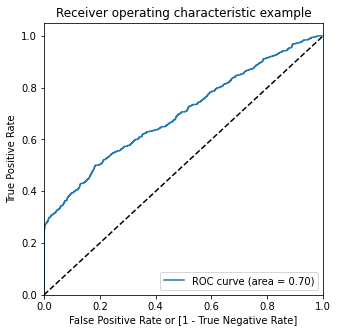

In [294]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [295]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 27.63%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.16      0.28       131

    accuracy                           0.99     13792
   macro avg       1.00      0.58      0.64     13792
weighted avg       0.99      0.99      0.99     13792



In [296]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

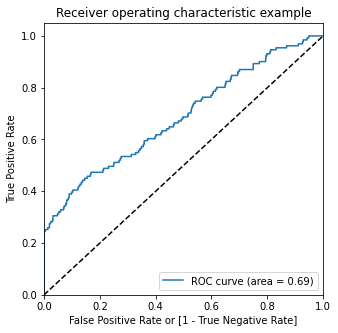

In [297]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 2. Decision Tree

In [298]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [299]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.187178,0.002910,0.022289,0.007218,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.679781,0.663359,0.685477,0.676206,0.009377,3
1,0.164977,0.007461,0.028161,0.009778,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.679781,0.663359,0.685477,0.676206,0.009377,3
2,0.209985,0.014688,0.024751,0.003801,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.685060,0.673692,0.682964,0.680572,0.004940,1
3,0.207777,0.011124,0.022233,0.004522,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.685060,0.673692,0.682964,0.680572,0.004940,1
4,0.323704,0.011697,0.028565,0.004240,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.657823,0.636160,0.686499,0.660161,0.020617,6
5,0.336796,0.021684,0.020099,0.003160,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.657823,0.637124,0.686503,0.660483,0.020246,5
6,0.275535,0.038482,0.015830,0.004653,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.654476,0.637386,0.658211,0.650024,0.009066,8
7,0.202384,0.009943,0.021237,0.003267,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.654472,0.637386,0.658241,0.650033,0.009074,7


In [300]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.6805720370806126
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [301]:

# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

Train Result:
Accuracy Score: 99.28%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992751    1.000000  0.992767      0.996375      0.992820
recall         1.000000    0.240000  0.992767      0.620000      0.992767
f1-score       0.996362    0.387097  0.992767      0.691729      0.990564
support    54641.000000  525.000000  0.992767  55166.000000  55166.000000
_______________________________________________
Confusion Matrix:


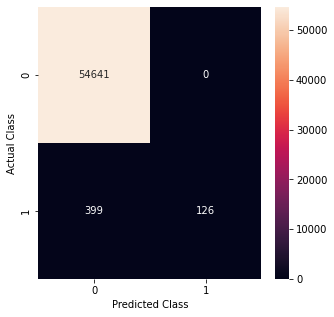

Train Result:
Accuracy Score: 99.27%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992733    1.000000  0.992749      0.996367      0.992802
recall         1.000000    0.236641  0.992749      0.618321      0.992749
f1-score       0.996353    0.382716  0.992749      0.689535      0.990525
support    13661.000000  131.000000  0.992749  13792.000000  13792.000000
_______________________________________________
Confusion Matrix:


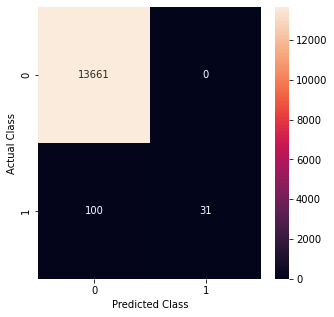

In [302]:
#1
y_train_pred = dt_imb_model.predict(X_train)
y_test_pred = dt_imb_model.predict(X_test)

print_score(y_train, y_train_pred)
print_score(y_test, y_test_pred)

In [303]:
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 38.71%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.24      0.39       525

    accuracy                           0.99     55166
   macro avg       1.00      0.62      0.69     55166
weighted avg       0.99      0.99      0.99     55166



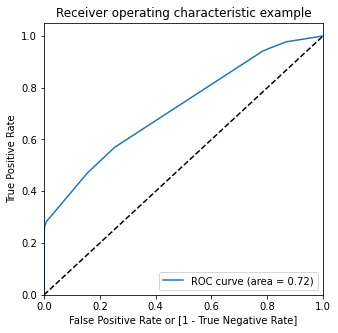

In [304]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [305]:
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)


F1 Score: 38.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       1.00      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



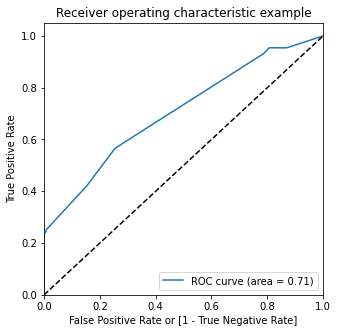

In [306]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 3. XGBoost

In [307]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...one,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [308]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.607354,0.040603,0.047865,0.002453,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.689964,0.660129,0.682200,0.677431,0.012638,5,0.859916,0.848158,0.852102,0.853392,0.004886
1,2.913280,0.123248,0.044859,0.005609,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.676940,0.664023,0.692815,0.677926,0.011775,4,0.867343,0.867903,0.869932,0.868393,0.001112
2,2.667096,0.239770,0.044519,0.014769,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.688988,0.669872,0.705832,0.688231,0.014691,3,0.871225,0.874043,0.874045,0.873104,0.001329
3,2.438515,0.088344,0.032906,0.001407,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.683941,0.638065,0.675176,0.665727,0.019885,6,0.874380,0.867049,0.884594,0.875341,0.007195
4,2.536080,0.042759,0.036286,0.007391,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.677224,0.688351,0.705754,0.690443,0.011741,1,0.914870,0.914371,0.912442,0.913894,0.001047
5,2.736796,0.142462,0.040653,0.012994,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.674862,0.685784,0.707735,0.689461,0.013670,2,0.926856,0.925648,0.927866,0.926790,0.000907


In [309]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.6904429880759381
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [310]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [311]:
# Printing best params
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[13:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

Train Result:
Accuracy Score: 99.31%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.993039    1.000000  0.993057      0.996520      0.993106
recall         1.000000    0.270476  0.993057      0.635238      0.993057
f1-score       0.996508    0.425787  0.993057      0.711147      0.991076
support    54641.000000  525.000000  0.993057  55166.000000  55166.000000
_______________________________________________
Confusion Matrix:


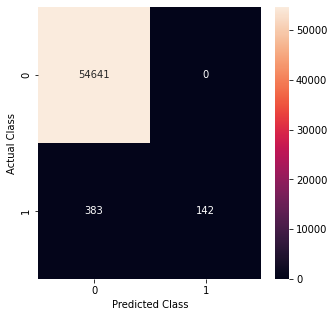

Train Result:
Accuracy Score: 99.27%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992733    0.968750  0.992677      0.980741      0.992505
recall         0.999927    0.236641  0.992677      0.618284      0.992677
f1-score       0.996317    0.380368  0.992677      0.688342      0.990466
support    13661.000000  131.000000  0.992677  13792.000000  13792.000000
_______________________________________________
Confusion Matrix:


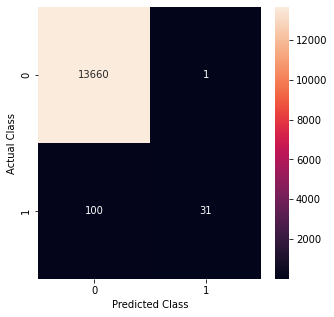

In [312]:
#1
y_train_pred = xgb_imb_model.predict(X_train)
y_test_pred = xgb_imb_model.predict(X_test)

print_score(y_train, y_train_pred)
print_score(y_test, y_test_pred)

In [313]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 42.58%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.27      0.43       525

    accuracy                           0.99     55166
   macro avg       1.00      0.64      0.71     55166
weighted avg       0.99      0.99      0.99     55166



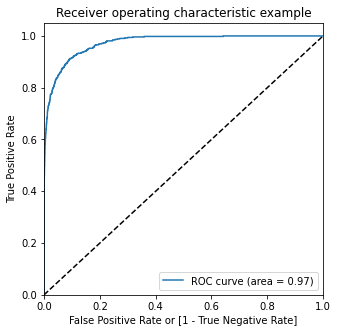

In [314]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [315]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 38.04%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       0.97      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       0.98      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



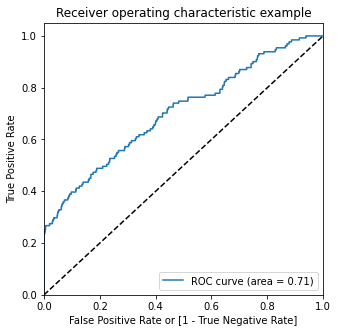

In [316]:
#### Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## 4. Random Forest Classifier

In [317]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [318]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.869370,0.425149,0.289959,0.014940,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.673041,0.694405,0.709258,0.692235,0.014865,8
1,3.609939,0.397576,0.306745,0.036233,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.690041,0.696196,0.719931,0.702056,0.012887,2
2,3.972626,0.244813,0.294947,0.043105,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.685500,0.691534,0.718563,0.698532,0.014376,3
3,3.497389,0.299919,0.277810,0.011031,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.691867,0.700922,0.715366,0.702718,0.009677,1
4,5.983327,0.544047,0.445762,0.094178,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.683319,0.689885,0.715943,0.696383,0.014089,5
5,6.072569,0.759404,0.470481,0.053421,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.677474,0.695057,0.716707,0.696413,0.016046,4
6,5.897518,0.265916,0.464401,0.051060,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.683009,0.681594,0.712111,0.692238,0.014064,7
7,6.057125,0.132385,0.539688,0.012518,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.685200,0.687235,0.710636,0.694357,0.011541,6


In [319]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.7027183892106278
RandomForestClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100)


In [320]:
# Printing best params
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}

In [327]:
# Model with optimal hyperparameters
rf_imb_model = RandomForestClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Train Result:
Accuracy Score: 99.27%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992643    1.000000  0.992659      0.996321      0.992713
recall         1.000000    0.228571  0.992659      0.614286      0.992659
f1-score       0.996308    0.372093  0.992659      0.684200      0.990367
support    54641.000000  525.000000  0.992659  55166.000000  55166.000000
_______________________________________________
Confusion Matrix:


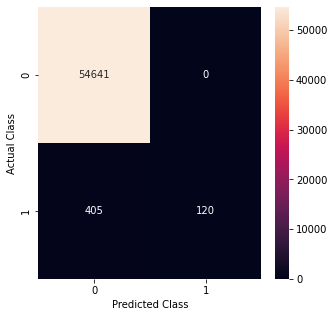

Train Result:
Accuracy Score: 99.27%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992733    1.000000  0.992749      0.996367      0.992802
recall         1.000000    0.236641  0.992749      0.618321      0.992749
f1-score       0.996353    0.382716  0.992749      0.689535      0.990525
support    13661.000000  131.000000  0.992749  13792.000000  13792.000000
_______________________________________________
Confusion Matrix:


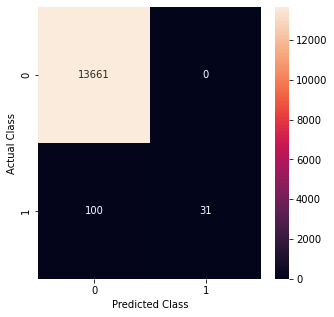

In [328]:
#1
y_train_pred = rf_imb_model.predict(X_train)
y_test_pred = rf_imb_model.predict(X_test)

print_score(y_train, y_train_pred)
print_score(y_test, y_test_pred)

In [330]:
# Predictions on the train set

y_train_pred = rf_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 37.21%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     54641
           1       1.00      0.23      0.37       525

    accuracy                           0.99     55166
   macro avg       1.00      0.61      0.68     55166
weighted avg       0.99      0.99      0.99     55166



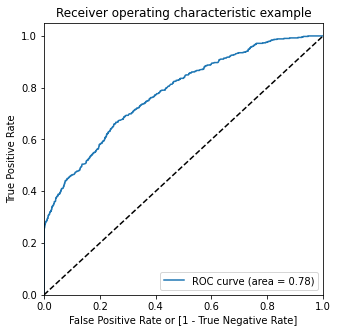

In [331]:
# Predicted probability
y_train_pred_proba_rf = rf_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba_rf)

In [332]:
# Predictions on the test set
y_test_pred = rf_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 38.27%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13661
           1       1.00      0.24      0.38       131

    accuracy                           0.99     13792
   macro avg       1.00      0.62      0.69     13792
weighted avg       0.99      0.99      0.99     13792



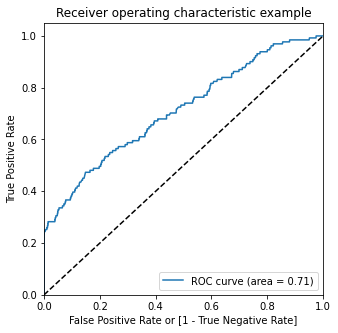

In [333]:
# Predicted probability
y_test_pred_proba = rf_imb_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [264]:
y_test_pred_proba

array([0.01182833, 0.00790342, 0.00599148, ..., 0.00884977, 0.00793743,
       0.01004987])

# ANN

In [265]:
class_feat=df['FRAUD'].copy()
class_feat= class_feat.unique()
class_feat

array([0, 1], dtype=int64)

In [75]:
#function for confusion matrix
def conf_matrix(label,predicted_values):
    Predictions_CM = confusion_matrix(label, predicted_values, labels = [0, 1])
    class_feat=df['FRAUD'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

def print_score(label, prediction):
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix:") 
        conf_matrix(label, prediction)

In [267]:
df_dum.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [268]:
X.shape[1]

13

In [269]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [270]:
df['date'] = df['DATETIME'].dt.date

In [271]:
df_nn = (
                df
#                 .assign(hour = df['DATETIME'].dt.hour)
#                 .assign(day = df['DATETIME'].dt.day)
#                 .assign(month = df['DATETIME'].dt.month)
#                 .assign(day_of_week = df['DATETIME'].dt.dayofweek)
#                 .assign(week_of_year = df['DATETIME'].dt.isocalendar().week)
                .assign(date = df['DATETIME'].dt.date)
              )

In [272]:
# def onehot_encode_pd(df, cols):
#     for col in cols:
#         dummies = pd.get_dummies(df[col], prefix=col)
#         df = pd.concat([df, dummies], axis=1).drop(columns=col)
    
#     return df

# df_nn = onehot_encode_pd(df_nn, ['month','day_of_week'])


In [273]:
df_nn = df_nn.set_index('date')

In [274]:
df_nn.columns

Index(['DATETIME', 'CUSTOMER_ID', 'TRASCATION AMOUNT',
       'DAYS_SINCE_FIRST_TRANSACTION', 'FRAUD', 'Airways', 'Clothing',
       'Electronics', 'Food', 'Footwear', 'Grocery', 'Hotels', 'Insulation',
       'Rental Car', 'Retail'],
      dtype='object')

In [275]:
df_nn = df_nn.drop("DATETIME",axis=1)

In [276]:
df_nn.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,
2018-09-20,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
2018-08-01,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
2018-06-19,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


# Analytics Vidhya


In [277]:
scalar = StandardScaler()

X = df_nn.drop('FRAUD', axis=1)
y = df_nn.FRAUD

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42, stratify=y_train_v)

X_train[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']]= scalar.fit_transform(X_train[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])
X_validate[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']] = scalar.fit_transform(X_validate[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])
X_test[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']] = scalar.fit_transform(X_test[['TRASCATION AMOUNT', 'DAYS_SINCE_FIRST_TRANSACTION','CUSTOMER_ID']])


w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.009503832608245288
Non-Fraudulant transaction weight: 0.9904961673917547


In [278]:
X_train.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,
2018-05-19,-0.167102,-0.580477,-0.655139,0,0,0,0,0,0,1,0,0,0
2018-04-17,-1.309910,-1.165720,-1.219101,0,0,0,0,0,0,0,1,0,0
2018-07-08,-1.422904,1.384731,0.226053,0,0,0,0,0,0,0,0,0,1
2018-06-01,-0.445295,0.030634,-0.426029,0,0,0,0,0,0,0,0,1,0
2018-06-01,0.352812,0.167129,-0.426029,0,0,0,0,0,0,0,0,1,0


In [298]:
input_dim = X_train.shape[1]
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    start1 = time()
    optimizerL = ['Adam', 'RMSprop', 'Adamax']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'tanh']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=input_dim, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    print('-'*90)
    print(f'iteration completed in {time() - start1:.2f} secs')
    print("-"*90)
    
    return score

In [299]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 2),
    'optimizer':(0,2),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
start = time()

nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

print('-'*90)
print(f'iteration completed in {time() - start:.2f} secs')
print("-"*90)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
iteration completed in 12.56 secs
------------------------------------------------------------------------------------------
|  1        |  0.9905   |  1.224    |  335.3    |  0.4361   |  0.2308   |  43.63    |  1.298    |  1.045    |  0.426    |  31.48    |  0.3377   |  1.981    |
------------------------------------------------------------------------------------------
iteration completed in 59.83 secs
------------------------------------------------------------------------------------------
|  2        |  0.9916   |  0.4755   |  265.0    |  0.6696   |  0.1864   |  41.94    |  1.932  

------------------------------------------------------------------------------------------
iteration completed in 16.54 secs
------------------------------------------------------------------------------------------
|  18       |  0.9911   |  1.946    |  370.8    |  0.2978   |  0.221    |  21.03    |  1.06     |  2.468    |  0.5033   |  29.63    |  0.00893  |  1.701    |
------------------------------------------------------------------------------------------
iteration completed in 39.11 secs
------------------------------------------------------------------------------------------
|  19       |  0.9905   |  1.073    |  778.8    |  0.6616   |  0.2516   |  51.06    |  1.852    |  2.656    |  0.4743   |  83.8     |  0.01418  |  0.7935   |
------------------------------------------------------------------------------------------
iteration completed in 37.52 secs
------------------------------------------------------------------------------------------
|  20       |  0.9905   |  0.2567   

In [300]:
nn_bo.max

{'target': 0.9916356229581309,
 'params': {'activation': 0.47545290780004557,
  'batch_size': 264.95412756096925,
  'dropout': 0.6696002382466298,
  'dropout_rate': 0.1863728758202091,
  'epochs': 41.94028241652148,
  'layers1': 1.9324428197899461,
  'layers2': 1.2367355022465671,
  'learning_rate': 0.08321798850177216,
  'neurons': 91.06967612446154,
  'normalization': 0.7939625604796284,
  'optimizer': 1.6811392974485624}}

In [301]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'tanh']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'RMSprop', 'Adamax']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 
             'RMSprop':RMSprop(learning_rate=learning_rate),
            'Adamax':Adamax(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'relu',
 'batch_size': 265,
 'dropout': 0.6696002382466298,
 'dropout_rate': 0.1863728758202091,
 'epochs': 42,
 'layers1': 2,
 'layers2': 1,
 'learning_rate': 0.08321798850177216,
 'neurons': 91,
 'normalization': 0.7939625604796284,
 'optimizer': <keras.optimizer_v2.adamax.Adamax at 0x1ae2df6bca0>}

In [302]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=input_dim, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'],metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
r = nn.fit(X_train, y_train, validation_data=(X_validate, y_validate), verbose=1)


Epoch 1/42
146/146 [==============================] - 2s 7ms/step - loss: 0.1780 - accuracy: 0.9901 - val_loss: 0.0502 - val_accuracy: 0.9905
Epoch 2/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0464 - accuracy: 0.9918 - val_loss: 0.0446 - val_accuracy: 0.9922
Epoch 3/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0463 - accuracy: 0.9919 - val_loss: 0.0439 - val_accuracy: 0.9926
Epoch 4/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0454 - accuracy: 0.9920 - val_loss: 0.0465 - val_accuracy: 0.9921
Epoch 5/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0452 - accuracy: 0.9922 - val_loss: 0.0474 - val_accuracy: 0.9920
Epoch 6/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0451 - accuracy: 0.9922 - val_loss: 0.0458 - val_accuracy: 0.9923
Epoch 7/42
146/146 [==============================] - 1s 5ms/step - loss: 0.0467 - accuracy: 0.9923 - val_loss: 0.0495 - val_accuracy: 0.9914
Epoch 

In [303]:
#1
nn.build_fn().summary()

Model: "sequential_541"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3191 (Dense)           (None, 91)                1274      
_________________________________________________________________
batch_normalization_240 (Bat (None, 91)                364       
_________________________________________________________________
dense_3192 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3193 (Dense)           (None, 91)                8372      
_________________________________________________________________
dropout_250 (Dropout)        (None, 91)                0         
_________________________________________________________________
dense_3194 (Dense)           (None, 91)                8372      
_________________________________________________________________
dense_3195 (Dense)           (None, 1)              

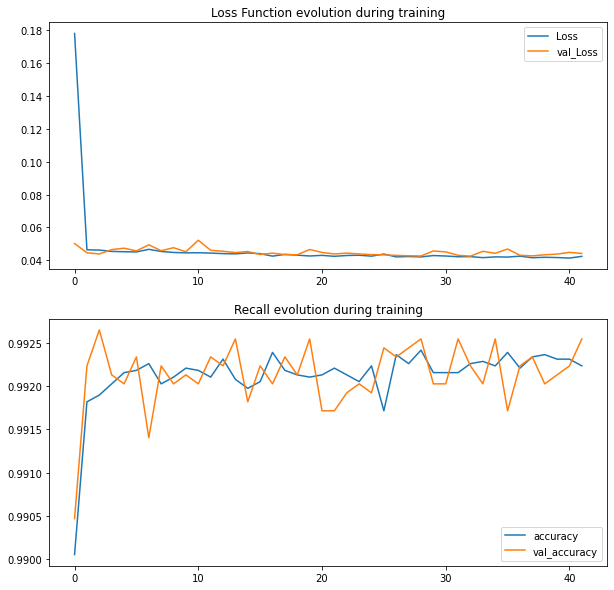

In [304]:
#1
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()


plt.subplot(2, 1, 2)

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

Train Result:
Accuracy Score: 99.29%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992939    0.989583   0.99293      0.991261      0.992907
recall         0.999974    0.258856   0.99293      0.629415      0.992930
f1-score       0.996444    0.410367   0.99293      0.703406      0.990874
support    38249.000000  367.000000   0.99293  38616.000000  38616.000000
_______________________________________________
Confusion Matrix:


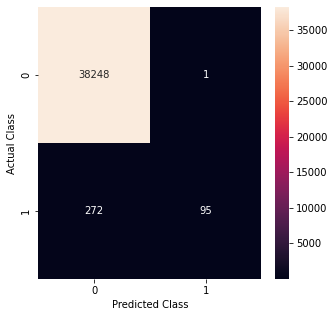

Train Result:
Accuracy Score: 99.23%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992300    1.000000  0.992314      0.996150      0.992374
recall         1.000000    0.192893  0.992314      0.596447      0.992314
f1-score       0.996135    0.323404  0.992314      0.659770      0.989729
support    20491.000000  197.000000  0.992314  20688.000000  20688.000000
_______________________________________________
Confusion Matrix:


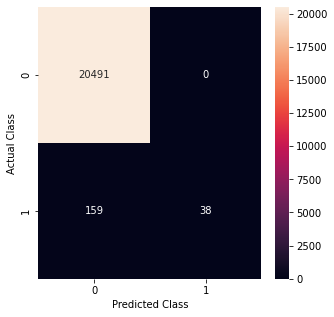

In [305]:
#1
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

print_score(y_train, y_train_pred.round())
print_score(y_test, y_test_pred.round())

In [306]:
#1
# Predictions on the train set

y_train_pred = nn.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 41.04%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     38249
           1       0.99      0.26      0.41       367

    accuracy                           0.99     38616
   macro avg       0.99      0.63      0.70     38616
weighted avg       0.99      0.99      0.99     38616



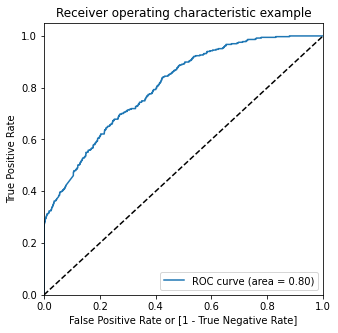

In [307]:
#1
# Predicted probability
y_train_pred_proba_rf = nn.predict_proba(X_train)[:,1]

# Plot the ROC curve

draw_roc(y_train, y_train_pred_proba_rf)

In [308]:
#1
# Predictions on the test set
y_test_pred = nn.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 32.34%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20491
           1       1.00      0.19      0.32       197

    accuracy                           0.99     20688
   macro avg       1.00      0.60      0.66     20688
weighted avg       0.99      0.99      0.99     20688



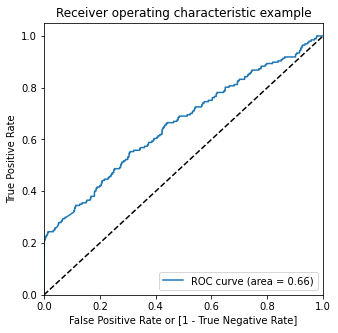

In [309]:
#1
# Predicted probability
y_test_pred_proba = nn.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# LSTM/RNN

In [388]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

In [76]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    print()
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
#     tf.cast(true_positives, tf.float32) 
#     tf.cast(possible_positives, tf.float32) 
#     tf.cast(predicted_positives, tf.float32) 
    
    
    precision = tf.cast(true_positives, tf.float32)  / (tf.cast(possible_positives, tf.float32)  + K.epsilon())
    recall =  tf.cast(true_positives, tf.float32) / (tf.cast(predicted_positives, tf.float32)  + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [489]:
df.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,2018-06-19 4:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [491]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [492]:
df['date'] = df['DATETIME'].dt.date

In [611]:
df_nn = (
                df
#                 .assign(hour = df['DATETIME'].dt.hour)
#                 .assign(day = df['DATETIME'].dt.day)
#                 .assign(month = df['DATETIME'].dt.month)
#                 .assign(day_of_week = df['DATETIME'].dt.dayofweek)
#                 .assign(week_of_year = df['DATETIME'].dt.isocalendar().week)
                .assign(date = df['DATETIME'].dt.date)
              )

In [612]:
# def onehot_encode_pd(df, cols):
#     for col in cols:
#         dummies = pd.get_dummies(df[col], prefix=col)
#         df = pd.concat([df, dummies], axis=1).drop(columns=col)
    
#     return df

# df_nn = onehot_encode_pd(df_nn, ['month','day_of_week'])


In [613]:
df_nn.head(3)

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail,date
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0,2018-09-20
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0,2018-09-20
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01


In [614]:
df_nn.set_index('date', inplace=True)
# df_nn.set_axis(df_nn['date'], inplace=True)

In [615]:
df_nn = df_nn.drop("DATETIME",axis=1)

In [616]:
T = 20
# LR = 0.0001
# EPOCH = 20
# BATCH = 512

In [617]:
df_nn.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,
2018-09-20,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
2018-08-01,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
2018-06-19,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [576]:
X = df_nn.drop('FRAUD', axis=1).sort_index()
y = df_nn.FRAUD.sort_index()

train_features_v, test_features, train_labels_v, test_labels = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
train_features, val_features, train_labels, val_labels = train_test_split(train_features_v, train_labels_v, 
                                                            test_size=0.2, random_state=42, stratify=train_labels_v)




prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

prepend_features = val_features.iloc[-(T-1):]
val_features = pd.concat([prepend_features, val_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape, val_features.shape, val_labels.shape

((38616, 13), (38616,), (20707, 13), (20688,), (9673, 13), (9654,))

In [577]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

# The Scaler is fit on the training set and then applied to the test set
scaled_val_features = pd.DataFrame(scaler.transform(val_features.values),
                                    index=val_features.index,
                                    columns=val_features.columns)

scaled_train_features.shape, scaled_test_features.shape , scaled_val_features.shape

((38616, 13), (20707, 13), (9673, 13))

In [579]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')


X_val, y_val = [], []
for i in range(val_labels.shape[0]):
    X_val.append(scaled_val_features.iloc[i:i+T].values)
    y_val.append(val_labels.iloc[i])
X_val, y_val = np.array(X_val), np.array(y_val).reshape(-1,1)  

print(f'Validation data dimensions: {X_val.shape}, {y_val.shape}')

Train data dimensions: (38597, 20, 13), (38597, 1)
Test data dimensions: (20688, 20, 13), (20688, 1)
Validation data dimensions: (9654, 20, 13), (9654, 1)


# LSTM M1

In [313]:
lstm1 = Sequential()
lstm1.add(LSTM(35,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
lstm1.add(LSTM(35))
lstm1.add(Dense(1, activation='sigmoid'))
lstm1.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

In [ ]:
start = time()

# ld = ReduceLROnPlateau(monitor='loss', patience=1, verbose=0, factor=0.5, min_lr=1e-8)
es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)

r11 = lstm1.fit(X_train, y_train, 
                    epochs=38,
                    batch_size=549,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[es])

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

Epoch 1/38


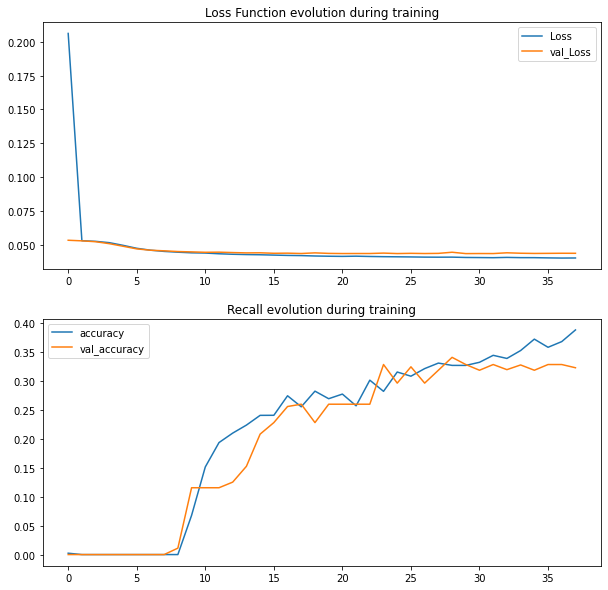

In [115]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r11.history['loss'], label='Loss')
plt.plot(r11.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(r11.history['get_f1'], label='accuracy')
plt.plot(r11.history['val_get_f1'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

In [116]:
# Evaluate the model:
train_loss, train_acc = lstm1.evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = lstm1.evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


-----------------------------------------------------------------
train accuracy = 38.0244%
test accuracy = 26.0148%


In [117]:
y_test_pred=lstm1.predict(X_test)
y_train_pred=lstm1.predict(X_train)

Train Result:
Accuracy Score: 99.21%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992299    0.904762  0.992121      0.948530      0.991465
recall         0.999805    0.192893  0.992121      0.596349      0.992121
f1-score       0.996038    0.317992  0.992121      0.657015      0.989581
support    20491.000000  197.000000  0.992121  20688.000000  20688.000000
_______________________________________________
Confusion Matrix:


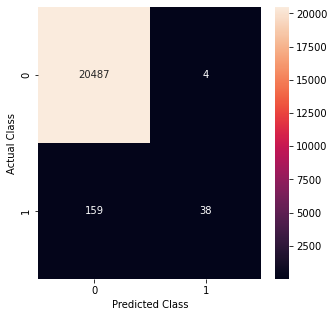

Train Result:
Accuracy Score: 99.31%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.993141    0.980952  0.993108      0.987047      0.993026
recall         0.999948    0.280654  0.993108      0.640301      0.993108
f1-score       0.996533    0.436441  0.993108      0.716487      0.991207
support    38230.000000  367.000000  0.993108  38597.000000  38597.000000
_______________________________________________
Confusion Matrix:


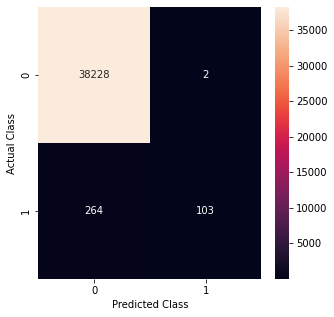

In [118]:
print_score(y_test, y_test_pred.round())
print_score(y_train, y_train_pred.round())

In [119]:

y_train_pred = lstm1.predict(X_train)
display_scores(y_train, y_train_pred.round())


F1 Score: 43.64%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     38230
           1       0.98      0.28      0.44       367

    accuracy                           0.99     38597
   macro avg       0.99      0.64      0.72     38597
weighted avg       0.99      0.99      0.99     38597



In [120]:
y_test_pred = lstm1.predict(X_test)
display_scores(y_test, y_test_pred.round())

F1 Score: 31.8%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20491
           1       0.90      0.19      0.32       197

    accuracy                           0.99     20688
   macro avg       0.95      0.60      0.66     20688
weighted avg       0.99      0.99      0.99     20688



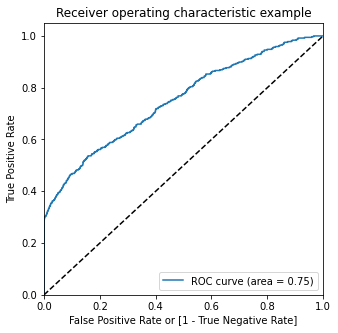

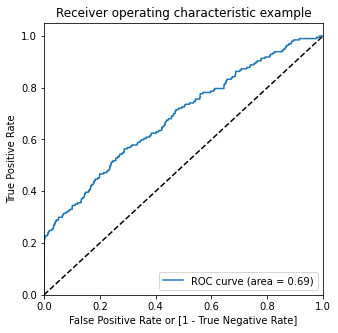

In [121]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, lstm1.predict(X_train))))[:,0]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, lstm1.predict(X_test))))[:,0]

draw_roc(y_test, y_test_pred_proba)

# RNN M1

In [122]:
rnn1 = Sequential()
rnn1.add(SimpleRNN(22,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
rnn1.add(SimpleRNN(22))
rnn1.add(Dense(1, activation='sigmoid'))
rnn1.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

In [123]:
start = time()

# ld = ReduceLROnPlateau(monitor='loss', patience=1, verbose=0, factor=0.5, min_lr=1e-8)
es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)

r21 = rnn1.fit(X_train, y_train, 
                    epochs=22,
                    batch_size=631,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[es])

Epoch 1/22


62/62 [==============================] - 6s 37ms/step - loss: 0.4238 - get_f1: 0.0146 - val_loss: 0.0746 - val_get_f1: 0.0000e+00
Epoch 2/22
62/62 [==============================] - 2s 25ms/step - loss: 0.0597 - get_f1: 0.0000e+00 - val_loss: 0.0545 - val_get_f1: 0.0000e+00
Epoch 3/22
62/62 [==============================] - 1s 24ms/step - loss: 0.0534 - get_f1: 0.0000e+00 - val_loss: 0.0525 - val_get_f1: 0.0000e+00
Epoch 4/22
62/62 [==============================] - 1s 23ms/step - loss: 0.0518 - get_f1: 0.0000e+00 - val_loss: 0.0513 - val_get_f1: 0.0000e+00
Epoch 5/22
62/62 [==============================] - 1s 23ms/step - loss: 0.0505 - get_f1: 0.0000e+00 - val_loss: 0.0504 - val_get_f1: 0.0000e+00
Epoch 6/22
62/62 [==============================] - 1s 22ms/step - loss: 0.0491 - get_f1: 0.0000e+00 - val_loss: 0.0492 - val_get_f1: 0.0000e+00
Epoch 7/22
62/62 [==============================] - 1s 24ms/step - loss: 0.0477 - get_f1: 0.0000e+00 - val_loss: 0.0483 - val_get_f1

In [124]:
rnn1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20, 22)            792       
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 22)                990       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 23        
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


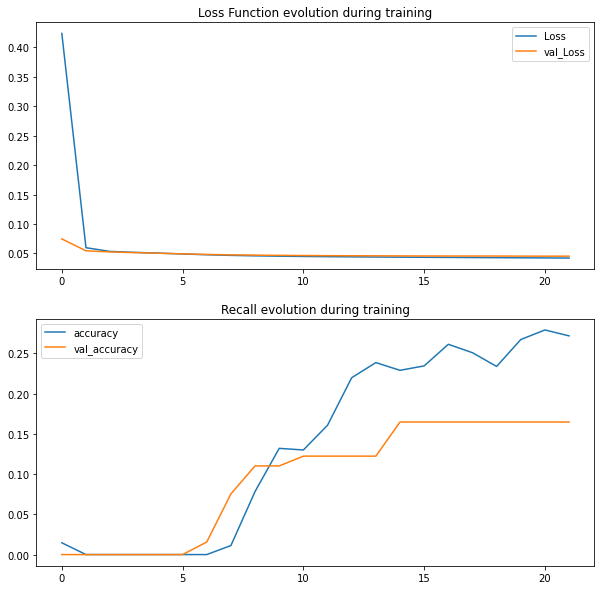

In [125]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r21.history['loss'], label='Loss')
plt.plot(r21.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(r21.history['get_f1'], label='accuracy')
plt.plot(r21.history['val_get_f1'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

In [126]:
# Evaluate the model:
train_loss, train_acc = rnn1.evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = rnn1.evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


-----------------------------------------------------------------
train accuracy = 27.7545%
test accuracy = 18.2874%


In [127]:
y_test_pred=rnn1.predict(X_test)
y_train_pred=rnn1.predict(X_train)


Train Result:
Accuracy Score: 99.16%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.991628    0.960000  0.991589      0.975814      0.991326
recall         0.999951    0.121827  0.991589      0.560889      0.991589
f1-score       0.995772    0.216216  0.991589      0.605994      0.988349
support    20491.000000  197.000000  0.991589  20688.000000  20688.000000
_______________________________________________
Confusion Matrix:


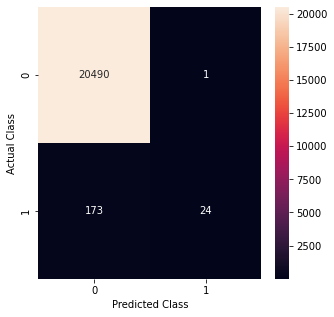

Train Result:
Accuracy Score: 99.23%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.992317    1.000000  0.992331      0.996158      0.992390
recall         1.000000    0.193460  0.992331      0.596730      0.992331
f1-score       0.996144    0.324201  0.992331      0.660172      0.989754
support    38230.000000  367.000000  0.992331  38597.000000  38597.000000
_______________________________________________
Confusion Matrix:


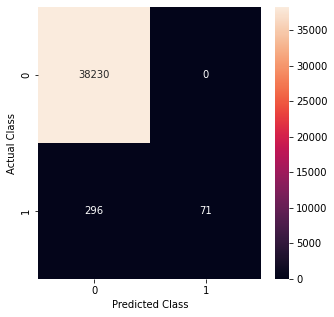

In [128]:

print_score(y_test, y_test_pred.round())
print_score(y_train, y_train_pred.round())

In [129]:
y_train_pred = rnn1.predict(X_train)
display_scores(y_train, y_train_pred.round())

F1 Score: 32.42%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     38230
           1       1.00      0.19      0.32       367

    accuracy                           0.99     38597
   macro avg       1.00      0.60      0.66     38597
weighted avg       0.99      0.99      0.99     38597



In [130]:
y_test_pred = rnn1.predict(X_test)
display_scores(y_test, y_test_pred.round())

F1 Score: 21.62%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     20491
           1       0.96      0.12      0.22       197

    accuracy                           0.99     20688
   macro avg       0.98      0.56      0.61     20688
weighted avg       0.99      0.99      0.99     20688



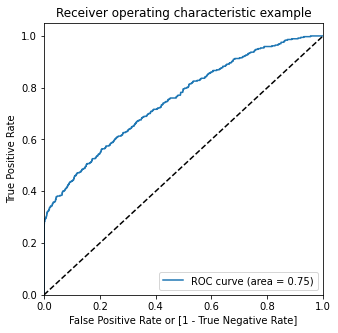

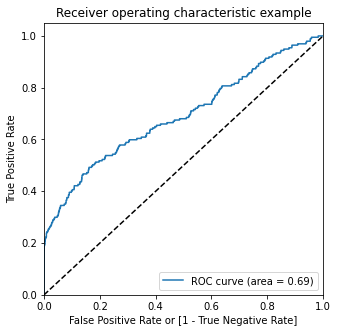

In [131]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, rnn1.predict(X_train))))[:,0]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, rnn1.predict(X_test))))[:,0]

draw_roc(y_test, y_test_pred_proba)

# keras Tuner


In [278]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    print()
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
#     tf.cast(true_positives, tf.float32) 
#     tf.cast(possible_positives, tf.float32) 
#     tf.cast(predicted_positives, tf.float32) 
    
    
    precision = tf.cast(true_positives, tf.float32)  / (tf.cast(possible_positives, tf.float32)  + K.epsilon())
    recall =  tf.cast(true_positives, tf.float32) / (tf.cast(predicted_positives, tf.float32)  + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [279]:
df.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail,date
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0,2018-09-20
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0,2018-09-20
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01
4,2018-06-19 04:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0,2018-06-19


In [280]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [281]:
df['date'] = df['DATETIME'].dt.date

In [282]:
df_nn = (
                df
#                 .assign(hour = df['DATETIME'].dt.hour)
#                 .assign(day = df['DATETIME'].dt.day)
#                 .assign(month = df['DATETIME'].dt.month)
#                 .assign(day_of_week = df['DATETIME'].dt.dayofweek)
#                 .assign(week_of_year = df['DATETIME'].dt.isocalendar().week)
                .assign(date = df['DATETIME'].dt.date)
              )

In [283]:
# def onehot_encode_pd(df, cols):
#     for col in cols:
#         dummies = pd.get_dummies(df[col], prefix=col)
#         df = pd.concat([df, dummies], axis=1).drop(columns=col)
    
#     return df

# df_nn = onehot_encode_pd(df_nn, ['month','day_of_week'])


In [284]:
df_nn.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail,date
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0,2018-09-20
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0,2018-09-20
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01
4,2018-06-19 04:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0,2018-06-19


In [285]:
df_nn = df_nn.set_index('date')
# df_nn.set_axis(df_nn['date'], inplace=True)

In [286]:
df_nn = df_nn.drop("DATETIME",axis=1)

In [258]:
df_nn.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,
2018-09-20,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
2018-08-01,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
2018-06-19,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [287]:
T = 20
# LR = 0.0001
# EPOCH = 20
# BATCH = 512

In [288]:
df_nn.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,
2018-09-20,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
2018-08-01,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
2018-06-19,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [289]:
X = df_nn.drop('FRAUD', axis=1).sort_index()
y = df_nn.FRAUD.sort_index()

train_features_v, test_features, train_labels_v, test_labels = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
train_features, val_features, train_labels, val_labels = train_test_split(train_features_v, train_labels_v, 
                                                            test_size=0.2, random_state=42, stratify=train_labels_v)



prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

prepend_features = val_features.iloc[-(T-1):]
val_features = pd.concat([prepend_features, val_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape, val_features.shape, val_labels.shape

((38616, 13), (38616,), (20707, 13), (20688,), (9673, 13), (9654,))

In [290]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

# The Scaler is fit on the training set and then applied to the test set
scaled_val_features = pd.DataFrame(scaler.transform(val_features.values),
                                    index=val_features.index,
                                    columns=val_features.columns)

scaled_train_features.shape, scaled_test_features.shape , scaled_val_features.shape

((38616, 13), (20707, 13), (9673, 13))

In [291]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')


X_val, y_val = [], []
for i in range(val_labels.shape[0]):
    X_val.append(scaled_val_features.iloc[i:i+T].values)
    y_val.append(val_labels.iloc[i])
X_val, y_val = np.array(X_val), np.array(y_val).reshape(-1,1)  

print(f'Validation data dimensions: {X_val.shape}, {y_val.shape}')

Train data dimensions: (38597, 20, 13), (38597, 1)
Test data dimensions: (20688, 20, 13), (20688, 1)
Validation data dimensions: (9654, 20, 13), (9654, 1)


In [264]:
import pandas as pd
import math
import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import save_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from pickle import dump,load
from keras.layers import Dense, SimpleRNN

# Bayesian Tuner LSTM


In [244]:
# input_dim = X_train.shape[1]
# Create function
def lstm_cl_bo2(neurons, learning_rate, batch_size, epochs,
              layers1, normalization, dropout, dropout_rate):
    start1 = time()
    
#     optimizerL = [ 'Adam']
#     optimizerD= {'Adam':Adam(learning_rate=learning_rate),
#                  }
#     activationL = ['relu', 'sigmoid', 'tanh']

    neurons = round(neurons)
    
#     activation = activationL[round(activation)]
#     print(round(optimizer))
#     optimizer = optimizerD[optimizerL[round(optimizer)]]

    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    
#     layers2 = round(layers2)

    def lstm_cl_fun():
        
        lstm = Sequential()
        print(" ")
        print("Shape:",X_train.shape[1],X_train.shape[2])
        print("Neurons:",neurons)
        print("Layers1",layers1)
        print("Normalization:",normalization )
        print(" ")
        
        print("-Layer 1 added")
        lstm.add(LSTM(neurons,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
        
        if normalization > 0.3:
            print("-Batch Layer 1 added")
            lstm.add(BatchNormalization())


        for i in range(layers1):
            print("-Layer", 2+i, "added")
            lstm.add(LSTM(neurons,return_sequences=True))
            
            if normalization > 0.7:
                print("-Batch Layer 2 added")
                lstm.add(BatchNormalization())
            
            
#         print("HI11-dropout:",dropout,"dropout-rate:",dropout_rate )
#         if dropout> 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         print("layers2",layers2)
        
        print("-Last LSTM layer added")
        lstm.add(LSTM(neurons))
        
        print("-Dense layer added")
        lstm.add(Dense(1, activation='sigmoid'))
        

        lstm.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

        return lstm


    es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)

    lstm = KerasClassifier(build_fn=lstm_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)

    score = cross_val_score(lstm, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    print('-'*90)
    print(f'iteration completed in {time() - start1:.2f} secs')
    print("-"*90)
    
    return score

In [245]:
params_lstm ={
    'neurons': (20, 50),
#     'activation':(0, 2),
#     'optimizer':(0,2),
    'learning_rate':(0.01, 1),
    'batch_size':(500, 1000),
    'epochs':(20, 50),
    'layers1':(0,1),
#     'layers2':(0,1),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

start = time()

# Run Bayesian Optimization
lstm_bo = BayesianOptimization(lstm_cl_bo2, params_lstm
#                              , random_state=111
                            )

lstm_bo.maximize(init_points=15, n_iter=2)

print('-'*90)
print(f'iteration completed in {time() - start:.2f} secs')
print("-"*90)


|   iter    |  target   | batch_... |  dropout  | dropou... |  epochs   |  layers1  | learni... |  neurons  | normal... |
-------------------------------------------------------------------------------------------------------------------------


NameError: name 'X_train' is not defined

In [ ]:
params_lstm_ = lstm_bo.max['params']
learning_rate = params_lstm_['learning_rate']
# activationL = ['relu', 'sigmoid', 'tanh']
# params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_lstm_['batch_size'] = round(params_lstm_['batch_size'])
params_lstm_['epochs'] = round(params_lstm_['epochs'])
params_lstm_['layers1'] = round(params_lstm_['layers1'])
# params_nn_['layers2'] = round(params_nn_['layers2'])
params_lstm_['neurons'] = round(params_lstm_['neurons'])
# optimizerL = ['Adam', 'RMSprop', 'Adamax']
# optimizerD= {'Adam':Adam(learning_rate=learning_rate),
#              'RMSprop':RMSprop(learning_rate=learning_rate), 
#              'Adamax':Adamax(learning_rate=learning_rate)}
params_lstm_['optimizer'] = 'Adam'
params_lstm_

In [ ]:
def lstm_cl_fun():
        
        lstm = Sequential()
        print(" ")
        print("Shape:",X_train.shape[1],X_train.shape[2])
        print("Neurons:",params_lstm_['neurons'])
        print("Layers1",params_lstm_['layers1'])
        print("Normalization:",params_lstm_['normalization'] )
        print(" ")
        
        print("-Layer 1 added")
        lstm.add(LSTM(params_lstm_['neurons'],return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
        
        if params_lstm_['normalization'] > 0.3:
            print("-Batch Layer 1 added")
            lstm.add(BatchNormalization())


        for i in range(params_lstm_['layers1']):
            print("-Layer", 2+i, "added")
            lstm.add(LSTM(params_lstm_['neurons'],return_sequences=True))
            
            if params_lstm_['normalization'] > 0.7:
                print("-Batch Layer 2 added")
                lstm.add(BatchNormalization())
            
            
#         print("HI11-dropout:",dropout,"dropout-rate:",dropout_rate )
#         if dropout> 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         print("layers2",layers2)
        
        print("-Last LSTM layer added")
        lstm.add(LSTM(params_lstm_['neurons']))
        
        print("-Dense layer added")
        lstm.add(Dense(1, activation='sigmoid'))
        

        lstm.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

        return lstm
    
es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)
lstm = KerasClassifier(build_fn=lstm_cl_fun, epochs=params_lstm_['epochs'], batch_size=params_lstm_['batch_size'],
                         verbose=0)
r1 = lstm.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)


In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r1.history['loss'], label='Loss')
plt.plot(r1.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(r1.history['get_f1'], label='accuracy')
plt.plot(r1.history['val_get_f1'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
lstm.build_fn().summary()

In [ ]:
# Evaluate the model:
train_loss, train_acc = lstm.build_fn().evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = lstm.build_fn().evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


In [ ]:
y_test_pred=lstm.predict(X_test)
y_train_pred=lstm.predict(X_train)

In [ ]:
print_score(y_test, y_test_pred)
print_score(y_train, y_train_pred)

In [ ]:

display_scores(y_train, y_train_pred)


display_scores(y_test, y_test_pred)

In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, lstm.predict(X_train))))[:,1]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, lstm.predict(X_test))))[:,1]

draw_roc(y_test, y_test_pred_proba)

# Bayesian Tuner RNN


In [ ]:
# SimpleRNN

# input_dim = X_train.shape[1]
# Create function
def rnn_cl_bo2(neurons, learning_rate, batch_size, epochs,
              layers1, normalization, dropout, dropout_rate):
    start1 = time()
    
#     optimizerL = [ 'Adam']
#     optimizerD= {'Adam':Adam(learning_rate=learning_rate),
#                  }
#     activationL = ['relu', 'sigmoid', 'tanh']

    neurons = round(neurons)
    
#     activation = activationL[round(activation)]
#     print(round(optimizer))
#     optimizer = optimizerD[optimizerL[round(optimizer)]]

    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    
#     layers2 = round(layers2)

    def rnn_cl_fun():
        
        rnn = Sequential()
        print("")
        print("Shape:",X_train.shape[1],X_train.shape[2])
        print("Neurons:",neurons)
        print("Layers1",layers1)
        print("Normalization:",normalization )
        print(" ")
        
        print("-Layer 1 added")
        rnn.add(SimpleRNN(neurons,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
        
        if normalization > 0.4:
            print("-Batch Layer 1 added")
            rnn.add(BatchNormalization())


        for i in range(layers1):
            print("-Layer", 2+i, "added")
            rnn.add(SimpleRNN(neurons,return_sequences=True))
            
            if normalization > 0.7:
                print("-Batch Layer 2 added")
                rnn.add(BatchNormalization())
            
            
#         print("HI11-dropout:",dropout,"dropout-rate:",dropout_rate )
#         if dropout> 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         print("layers2",layers2)
        
        print("-Last RNN layer added")
        rnn.add(SimpleRNN(neurons))
        
        print("-Dense layer added")
        rnn.add(Dense(1, activation='sigmoid'))
        

        rnn.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

        return rnn


    es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)

    rnn = KerasClassifier(build_fn=rnn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)

    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)

    score = cross_val_score(rnn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    
    print('-'*90)
    print(f'iteration completed in {time() - start1:.2f} secs')
    print("-"*90)
    
    return score

In [ ]:
# start = time()

params_rnn ={
    'neurons': (10, 50),
#     'activation':(0, 2),
#     'optimizer':(0,2),
    'learning_rate':(0.01, 1),
    'batch_size':(500, 1200),
    'epochs':(20, 50),
    'layers1':(0,1),
#     'layers2':(0,1),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

start = time()

# Run Bayesian Optimization
rnn_bo = BayesianOptimization(rnn_cl_bo2, params_rnn
#                              ,random_state=111
                            )

rnn_bo.maximize(init_points=15, n_iter=3)

print('-'*90)
print(f'iteration completed in {time() - start:.2f} secs')
print("-"*90)

# print('-'*65)
# print(f'Training was completed in {time() - start:.2f} secs')
# print('-'*65)

In [ ]:
params_rnn_ = rnn_bo.max['params']
learning_rate = params_rnn_['learning_rate']
# activationL = ['relu', 'sigmoid', 'tanh']
# params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_rnn_['batch_size'] = round(params_rnn_['batch_size'])
params_rnn_['epochs'] = round(params_rnn_['epochs'])
params_rnn_['layers1'] = round(params_rnn_['layers1'])
# params_nn_['layers2'] = round(params_nn_['layers2'])
params_rnn_['neurons'] = round(params_rnn_['neurons'])
# optimizerL = ['Adam', 'RMSprop', 'Adamax']
# optimizerD= {'Adam':Adam(learning_rate=learning_rate),
#              'RMSprop':RMSprop(learning_rate=learning_rate), 
#              'Adamax':Adamax(learning_rate=learning_rate)}
params_rnn_['optimizer'] = 'Adam'
params_rnn_

In [ ]:
# SimpleRNN
def rnn_cl_fun():
        
        rnn = Sequential()
        print(" ")
        print("Shape:",X_train.shape[1],X_train.shape[2])
        print("Neurons:",params_rnn_['neurons'])
        print("Layers1",params_rnn_['layers1'])
        print("Normalization:",params_rnn_['normalization'] )
        print(" ")
        
        print("-Layer 1 added")
        rnn.add(SimpleRNN(params_rnn_['neurons'],return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
        
        if params_rnn_['normalization'] > 0.4:
            print("-Batch Layer 1 added")
            rnn.add(BatchNormalization())


        for i in range(params_rnn_['layers1']):
            print("-Layer", 2+i, "added")
            rnn.add(SimpleRNN(params_rnn_['neurons'],return_sequences=True))
            
            if params_rnn_['normalization'] > 0.7:
                print("-Batch Layer 2 added")
                rnn.add(BatchNormalization())
            
            
#         print("HI11-dropout:",dropout,"dropout-rate:",dropout_rate )
#         if dropout> 0.5:
#             nn.add(Dropout(dropout_rate, seed=123))
#         print("layers2",layers2)
        
        print("-Last RNN layer added")
        rnn.add(SimpleRNN(params_rnn_['neurons']))
        
        print("-Dense layer added")
        rnn.add(Dense(1, activation='sigmoid'))
        

        rnn.compile(loss='binary_crossentropy', optimizer='Adam',metrics=[get_f1])

        return rnn
    
es = EarlyStopping(monitor='get_f1', mode='max', verbose=0, patience=20)
rnn = KerasClassifier(build_fn=rnn_cl_fun, epochs=params_rnn_['epochs'], batch_size=params_rnn_['batch_size'],
                         verbose=0)
r2 = rnn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)


In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(r2.history['loss'], label='Loss')
plt.plot(r2.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(r2.history['get_f1'], label='accuracy')
plt.plot(r2.history['val_get_f1'], label='val_accuracy')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
rnn.build_fn().summary()

In [ ]:
# Evaluate the model:
train_loss, train_acc = rnn.build_fn().evaluate(X_train, y_train,
                                       batch_size=512, verbose=0)
test_loss, test_acc = rnn.build_fn().evaluate(X_test, y_test,
                                     batch_size=512, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')


In [ ]:
y_test_pred=rnn.predict(X_test)
y_train_pred=rnn.predict(X_train)

In [ ]:
print_score(y_test, y_test_pred)
print_score(y_train, y_train_pred)

In [ ]:
display_scores(y_train, y_train_pred)
display_scores(y_test, y_test_pred)

In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, rnn.predict(X_train))))[:,1]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, rnn.predict(X_test))))[:,1]

draw_roc(y_test, y_test_pred_proba)

# LSTM M2

In [334]:
lstm2 = Sequential()
lstm2.add(LSTM(35,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
lstm2.add(Dense(35))
lstm2.add(Dense(1, activation='sigmoid'))
lstm2.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

IndexError: tuple index out of range

In [ ]:
start = time()

# ld = ReduceLROnPlateau(monitor='loss', patience=1, verbose=0, factor=0.5, min_lr=1e-8)
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)

r12 = lstm2.fit(X_train, y_train, 
                    epochs=38,
                    batch_size=549,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[es])

print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)

In [ ]:
y_test_pred=lstm2.predict(X_test)
y_train_pred=lstm2.predict(X_train)

In [ ]:
print_score(y_test, y_test_pred.round())
print_score(y_train, y_train_pred.round())

In [ ]:
y_train_pred = lstm2.predict(X_train)
display_scores(y_train, y_train_pred.round())

In [ ]:
y_test_pred = lstm2.predict(X_test)
display_scores(y_test, y_test_pred.round())

In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, lstm2.predict(X_train))))[:,1]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, lstm2.predict(X_test))))[:,1]

draw_roc(y_test, y_test_pred_proba)


# RNN M2

In [ ]:
rnn2 = Sequential()
rnn2.add(SimpleRNN(40,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
rnn2.add(BatchNormalization())
rnn2.add(SimpleRNN(40))
rnn2.add(Dense(1, activation='sigmoid'))
rnn2.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
r22 = rnn2.fit(X_train, y_train, 
                    epochs=22,
                    batch_size=631,
                    validation_data=(X_val, y_val),
                    shuffle=True,verbose=1,
                    callbacks=[es])

In [ ]:
y_test_pred=rnn2.predict(X_test)
y_train_pred=rnn2.predict(X_train)

In [ ]:
print_score(y_test, y_test_pred.round(), train=False)
print_score(y_train, y_train_pred.round(), train=False)

In [ ]:
y_train_pred = rnn2.predict(X_train)
display_scores(y_train, y_train_pred.round())

In [ ]:
y_test_pred = rnn2.predict(X_test)
display_scores(y_test, y_test_pred.round())

In [ ]:
def predict_prob(number):
  return [number[0],1-number[0]]

y_train_pred_proba = np.array(list(map(predict_prob, rnn2.predict(X_train))))[:,1]

draw_roc(y_train, y_train_pred_proba)

y_test_pred_proba = np.array(list(map(predict_prob, rnn2.predict(X_test))))[:,1]

draw_roc(y_test, y_test_pred_proba)

# Grid Search CV


In [46]:
df.head()

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0
3,2018-08-01 13:58:40,0,80.16,122,0,1,0,0,0,0,0,0,0,0,0
4,2018-06-19 4:18:11,0,90.07,79,0,0,0,0,0,0,0,0,1,0,0


In [47]:
df['DATETIME']= pd.to_datetime(df['DATETIME'])

In [48]:
df['date'] = df['DATETIME'].dt.date

In [49]:
df_nn = df.copy()

In [50]:
df_nn.head(3)

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail,date
0,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0,2018-09-20
1,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0,2018-09-20
2,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0,2018-08-01


In [51]:
df_nn.set_index('date', inplace=True)
# df_nn.set_axis(df_nn['DATETIME'], inplace=True)

In [52]:
df_nn.head(3)

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,,
2018-09-20,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0


In [56]:
# df_nn = df_nn.drop("DATETIME",axis=1)
# df_nn = df_nn.drop("date",axis=1)

In [54]:
df_nn.head(3)

,DATETIME,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,FRAUD,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,,,
2018-09-20,2018-09-20 11:49:41,0,88.11,172,0,0,0,0,0,0,0,1,0,0,0
2018-09-20,2018-09-20 20:21:57,0,78.25,172,0,0,0,0,0,0,1,0,0,0,0
2018-08-01,2018-08-01 12:11:36,0,62.28,122,0,1,0,0,0,0,0,0,0,0,0


In [57]:
X = df_nn.drop('FRAUD', axis=1).sort_index()
y = df_nn.FRAUD.sort_index()

train_features_v, test_features, train_labels_v, test_labels = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42, stratify=y)
train_features, val_features, train_labels, val_labels = train_test_split(train_features_v, train_labels_v, 
                                                            test_size=0.2, random_state=42, stratify=train_labels_v)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape, val_features.shape, val_labels.shape

((38616, 13), (38616,), (20688, 13), (20688,), (9654, 13), (9654,))

In [58]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

# The Scaler is fit on the training set and then applied to the test set
scaled_val_features = pd.DataFrame(scaler.transform(val_features.values),
                                    index=val_features.index,
                                    columns=val_features.columns)

scaled_train_features.shape, scaled_test_features.shape , scaled_val_features.shape

((38616, 13), (20688, 13), (9654, 13))

In [59]:
scaled_train_features.head()

,CUSTOMER_ID,TRASCATION AMOUNT,DAYS_SINCE_FIRST_TRANSACTION,Airways,Clothing,Electronics,Food,Footwear,Grocery,Hotels,Insulation,Rental Car,Retail
date,,,,,,,,,,,,,
2018-06-15,-1.478755,-0.772526,-0.191009,-0.311971,-0.331575,-0.346859,-0.380109,-0.316597,-0.327955,-0.296578,-0.386065,-0.298846,3.036211
2018-04-05,-1.149206,0.855534,-1.434512,-0.311971,3.015906,-0.346859,-0.380109,-0.316597,-0.327955,-0.296578,-0.386065,-0.298846,-0.329358
2018-09-20,0.234326,-0.204865,1.507861,-0.311971,-0.331575,-0.346859,2.630823,-0.316597,-0.327955,-0.296578,-0.386065,-0.298846,-0.329358
2018-05-24,0.530848,0.360267,-0.576320,-0.311971,-0.331575,2.883018,-0.380109,-0.316597,-0.327955,-0.296578,-0.386065,-0.298846,-0.329358
2018-06-19,-1.058024,-1.122545,-0.120953,-0.311971,-0.331575,-0.346859,-0.380109,-0.316597,-0.327955,-0.296578,2.590236,-0.298846,-0.329358


In [94]:
look_back = 10

train_generator = TimeseriesGenerator(scaled_train_features, train_labels, length=look_back, batch_size=512)     
test_generator = TimeseriesGenerator(scaled_test_features, test_labels, length=look_back, batch_size=512)
val_generator = TimeseriesGenerator(scaled_val_features, val_labels, length=look_back, batch_size=512)


In [99]:

batch_0 = test_generator[0]
x, y = batch_0

In [100]:
len(train_generator), len(test_generator),len(val_generator)

(76, 41, 19)

In [102]:
x.shape

(512, 10, 13)

In [270]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# model = Sequential()
# model.add(
#     LSTM(10,
#         activation='relu',
#         input_shape=(look_back,13))
# )
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# num_epochs = 25
# model.fit(train_generator, epochs=num_epochs,
# #           batch_size=512, 
#           verbose=1,validation_data=val_generator)

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)

lstm2 = Sequential()
lstm2.add(LSTM(35,return_sequences=True, input_shape=(10,13)))
lstm2.add(LSTM(35))
lstm2.add(Dense(1, activation='sigmoid'))
lstm2.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])


r12 = lstm2.fit(train_generator,
                    epochs=38,
                    shuffle=True,verbose=1,
                    callbacks=[es])

Epoch 1/38
76/76 [==============================] - 15s 104ms/step - loss: 0.2257 - accuracy: 0.9620
Epoch 2/38
76/76 [==============================] - 11s 142ms/step - loss: 0.0539 - accuracy: 0.9905
Epoch 3/38
76/76 [==============================] - 9s 114ms/step - loss: 0.0538 - accuracy: 0.9905
Epoch 4/38
76/76 [==============================] - 7s 92ms/step - loss: 0.0538 - accuracy: 0.9905
Epoch 5/38
76/76 [==============================] - 7s 89ms/step - loss: 0.0537 - accuracy: 0.9905
Epoch 6/38
76/76 [==============================] - 8s 99ms/step - loss: 0.0536 - accuracy: 0.9905
Epoch 7/38
76/76 [==============================] - 8s 105ms/step - loss: 0.0536 - accuracy: 0.9905
Epoch 8/38
76/76 [==============================] - 8s 110ms/step - loss: 0.0535 - accuracy: 0.9905
Epoch 9/38
76/76 [==============================] - 10s 127ms/step - loss: 0.0535 - accuracy: 0.9905
Epoch 10/38
76/76 [==============================] - 8s 111ms/step - loss: 0.0535 - accuracy: 0.9905

In [275]:
prediction = model.predict(test_generator)
y_test = test_labels[10:20688].copy()


In [276]:
min(prediction)

array([-2.8569338], dtype=float32)

In [273]:
y_test = test_labels[10:20688].copy()
# test_labels[test_labels==1]
# test_labels = test_labels.reset_index()
# test_labels.loc[test_labels['FRAUD']==1]

In [274]:
y_test[344]

1

In [243]:

#LSTM_HyperParameter_Tuning
def LSTM_HyperParameter_Tuning(config, train_generator, test_generator,val_generator):
    
    first_additional_layer, second_additional_layer, n_neurons, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer,
                                                  n_neurons, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, n_neurons,  dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        m = Sequential()
        m.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(10, 13)))
        m.add(Dropout(dropout))

        if first_additional_layer:
            m.add(LSTM(units=n_neurons, return_sequences=True))
            m.add(Dropout(dropout))

        if second_additional_layer:
            m.add(LSTM(units=n_neurons, return_sequences=True))
            m.add(Dropout(dropout))

#         if third_additional_layer:
#             m.add(GRU(units=n_neurons, return_sequences=True))
#             m.add(Dropout(dropout))

        m.add(LSTM(units=n_neurons, return_sequences=False))
        m.add(Dropout(dropout))
        m.add(Dense(units=1, activation='sigmoid'))
        m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        m.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = m.evaluate(train_generator, verbose=0)[1]
        test_accuracy = m.evaluate(test_generator, verbose=0)[1]

        hist.append(list((first_additional_layer, second_additional_layer, n_neurons,dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist


In [229]:
config = [[False], [False], [16, 32,64], [0.2,0.3]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

# hist = LSTM_HyperParameter_Tuning(config, train_generator, test_generator,val_generator)  # change x_train shape
hist = LSTM_HyperParameter_Tuning(config, train_generator, test_generator,val_generator)  # change x_train shape

[(False, False, 16, 0.2), (False, False, 16, 0.3), (False, False, 32, 0.2), (False, False, 32, 0.3), (False, False, 64, 0.2), (False, False, 64, 0.3)]


1th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06567, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.06567 to 0.05405, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.05405 to 0.05380, saving model to best_model.h5

Epoch 00004: val_loss did not improve from 0.05380

Epoch 00005: val_loss did not improve from 0.05380

Epoch 00006: val_loss did not improve from 0.05380

Epoch 00007: val_loss did not improve from 0.05380

Epoch 00008: val_loss did not improve from 0.05380
Epoch 00008: early stopping
0-th combination = (False, False, 16, 0.2) 
 train accuracy: 0.9904937148094177 and test accuracy: 0.9904729723930359
--------------------------------------------------------------------
---------------------------

In [230]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[5], ascending=True)
hist

,0,1,2,3,4,5
0,False,False,16,0.2,0.990494,0.990473
1,False,False,16,0.3,0.990494,0.990473
2,False,False,32,0.2,0.990494,0.990473
3,False,False,32,0.3,0.990494,0.990473
4,False,False,64,0.2,0.990494,0.990473
5,False,False,64,0.3,0.990494,0.990473


In [231]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n n_neurons = {hist.iloc[0, 2]}\n dropout = {hist.iloc[0, 3]}')



Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 n_neurons = 16
 dropout = 0.2


In [232]:
first_additional_layer, second_additional_layer, n_neurons, dropout = list(hist.iloc[0, :-2])

In [221]:
dropout

0.2

In [233]:
m = Sequential()
m.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(10,13)))
m.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))


m.add(LSTM(units=n_neurons, return_sequences=False))
m.add(Dropout(dropout))
m.add(Dense(units=1, activation='sigmoid'))
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

m.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[es, mc], verbose=0)


Epoch 00001: val_loss improved from inf to 0.05431, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.05431 to 0.05405, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.05405 to 0.05404, saving model to best_model.h5

Epoch 00004: val_loss did not improve from 0.05404

Epoch 00005: val_loss did not improve from 0.05404

Epoch 00006: val_loss did not improve from 0.05404

Epoch 00007: val_loss improved from 0.05404 to 0.05393, saving model to best_model.h5

Epoch 00008: val_loss did not improve from 0.05393

Epoch 00009: val_loss did not improve from 0.05393

Epoch 00010: val_loss did not improve from 0.05393

Epoch 00011: val_loss did not improve from 0.05393

Epoch 00012: val_loss improved from 0.05393 to 0.05393, saving model to best_model.h5

Epoch 00013: val_loss did not improve from 0.05393

Epoch 00014: val_loss did not improve from 0.05393

Epoch 00015: val_loss did not improve from 0.05393

Epoch 00016: val_loss did not improve from 0.053

In [234]:
m.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 10, 16)            1920      
_________________________________________________________________
dropout_50 (Dropout)         (None, 10, 16)            0         
_________________________________________________________________
lstm_66 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dropout_51 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 17        
Total params: 4,049
Trainable params: 4,049
Non-trainable params: 0
_________________________________________________________________


In [240]:
m.evaluate(test_generator, verbose=0)[1]

0.9904729723930359

In [241]:
prediction = model.predict(train_generator)
y_test = test_labels[10:20688].copy()

In [277]:
min(prediction)

array([-2.8569338], dtype=float32)

In [186]:
batch_0 = test_generator[0]
x, y = batch_0

In [210]:
prediction.shape

(20678, 1)

In [213]:
# y_test = y_test.to_numpy()
y_test.shape 


(20678,)

# Grid search 2 


In [304]:

#LSTM_HyperParameter_Tuning
def LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test,X_val, y_val):
    
    first_additional_layer, second_additional_layer, n_neurons, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer,
                                                  n_neurons, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, n_neurons,  dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        m = Sequential()
        m.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(20, 13)))
        m.add(Dropout(dropout))

        if first_additional_layer:
            m.add(LSTM(units=n_neurons, return_sequences=True))
            m.add(Dropout(dropout))

        if second_additional_layer:
            m.add(LSTM(units=n_neurons, return_sequences=True))
            m.add(Dropout(dropout))

#         if third_additional_layer:
#             m.add(GRU(units=n_neurons, return_sequences=True))
#             m.add(Dropout(dropout))

#         m.add(LSTM(units=n_neurons, return_sequences=False))
#         m.add(Dropout(dropout))
        m.add(Dense(units=1, activation='sigmoid'))
        m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        m.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = m.evaluate(X_train, y_train, verbose=0)[1]
        test_accuracy = m.evaluate( X_test, y_test, verbose=0)[1]

        hist.append(list((first_additional_layer, second_additional_layer, n_neurons,dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist


In [305]:
config = [[False], [False], [16, 32,64], [0.2,0.3]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

# hist = LSTM_HyperParameter_Tuning(config, train_generator, test_generator,val_generator)  # change x_train shape
hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test,X_val,y_val )  # change x_train shape

[(False, False, 16, 0.2), (False, False, 16, 0.3), (False, False, 32, 0.2), (False, False, 32, 0.3), (False, False, 64, 0.2), (False, False, 64, 0.3)]


1th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.06027, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.06027 to 0.05577, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.05577 to 0.05492, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.05492 to 0.05420, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.05420 to 0.05404, saving model to best_model.h5

Epoch 00006: val_loss did not improve from 0.05404

Epoch 00007: val_loss improved from 0.05404 to 0.05388, saving model to best_model.h5

Epoch 00008: val_loss did not improve from 0.05388

Epoch 00009: val_loss did not improve from 0.05388

Epoch 00010: val_loss improved from 0.05388 to 0.05385, saving model to best_model.h


Epoch 00001: val_loss improved from inf to 0.05606, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.05606 to 0.05437, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.05437 to 0.05391, saving model to best_model.h5

Epoch 00004: val_loss did not improve from 0.05391

Epoch 00005: val_loss improved from 0.05391 to 0.05389, saving model to best_model.h5

Epoch 00006: val_loss did not improve from 0.05389

Epoch 00007: val_loss improved from 0.05389 to 0.05386, saving model to best_model.h5

Epoch 00008: val_loss did not improve from 0.05386

Epoch 00009: val_loss did not improve from 0.05386

Epoch 00010: val_loss did not improve from 0.05386

Epoch 00011: val_loss improved from 0.05386 to 0.05385, saving model to best_model.h5

Epoch 00012: val_loss did not improve from 0.05385

Epoch 00013: val_loss did not improve from 0.05385

Epoch 00014: val_loss did not improve from 0.05385

Epoch 00015: val_loss did not improve from 0.05385

Epoch 00016: 

In [306]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[5], ascending=True)
hist

,0,1,2,3,4,5
0,False,False,16,0.2,0.990492,0.990478
1,False,False,16,0.3,0.990492,0.990478
2,False,False,32,0.2,0.990492,0.990478
3,False,False,32,0.3,0.990492,0.990478
4,False,False,64,0.2,0.990492,0.990478
5,False,False,64,0.3,0.990492,0.990478


In [307]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n n_neurons = {hist.iloc[0, 2]}\n dropout = {hist.iloc[0, 3]}')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 n_neurons = 16
 dropout = 0.2


In [308]:
first_additional_layer, second_additional_layer, n_neurons, dropout = list(hist.iloc[0, :-2])

In [309]:
m = Sequential()
m.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(20,13)))
m.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))


m.add(LSTM(units=n_neurons, return_sequences=False))
m.add(Dropout(dropout))
m.add(Dense(units=1, activation='sigmoid'))
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

m.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[es, mc], verbose=0)


Epoch 00001: val_loss improved from inf to 0.05143, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.05143 to 0.04721, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.04721 to 0.04665, saving model to best_model.h5

Epoch 00004: val_loss improved from 0.04665 to 0.04559, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.04559 to 0.04450, saving model to best_model.h5

Epoch 00006: val_loss did not improve from 0.04450

Epoch 00007: val_loss did not improve from 0.04450

Epoch 00008: val_loss did not improve from 0.04450

Epoch 00009: val_loss did not improve from 0.04450

Epoch 00010: val_loss did not improve from 0.04450
Epoch 00010: early stopping


In [310]:
m.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 20, 16)            1920      
_________________________________________________________________
dropout_62 (Dropout)         (None, 20, 16)            0         
_________________________________________________________________
lstm_82 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dropout_63 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 17        
Total params: 4,049
Trainable params: 4,049
Non-trainable params: 0
_________________________________________________________________


In [311]:
m.evaluate(test_generator, verbose=0)[1]

0.9886836409568787

In [ ]:
prediction = model.predict(train_generator)
y_test = test_labels[10:20688].copy()

In [312]:
min(prediction)

array([-2.8569338], dtype=float32)